# Pengumpulan Data

In [1]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, accuracy_score, plot_confusion_matrix, plot_roc_curve, precision_recall_curve, roc_curve
from finta import TA

In [2]:
df = pd.read_csv('TLKM.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1200 non-null   int64  
 1   index         1200 non-null   int64  
 2   day           1200 non-null   int64  
 3   date          1200 non-null   object 
 4   code          1200 non-null   object 
 5   open          1200 non-null   float64
 6   high          1200 non-null   float64
 7   low           1200 non-null   float64
 8   close         1200 non-null   float64
 9   volume        1200 non-null   int64  
 10  ma_5          1200 non-null   float64
 11  ma_10         1200 non-null   float64
 12  ma_20         1200 non-null   float64
 13  ma_50         1200 non-null   float64
 14  ma_100        1200 non-null   float64
 15  stoc_k_short  1200 non-null   float64
 16  stoc_d_long   1200 non-null   float64
 17  rsi           1200 non-null   float64
 18  macd          1200 non-null 

In [3]:
df.isnull().value_counts()

Unnamed: 0  index  day    date   code   open   high   low    close  volume  ma_5   ma_10  ma_20  ma_50  ma_100  stoc_k_short  stoc_d_long  rsi    macd   resistance  support
False       False  False  False  False  False  False  False  False  False   False  False  False  False  False   False         False        False  False  False       False      1200
dtype: int64

In [4]:
df.head()

,Unnamed: 0,index,day,date,code,open,high,low,close,volume,...,ma_10,ma_20,ma_50,ma_100,stoc_k_short,stoc_d_long,rsi,macd,resistance,support
0,0,0,1,2016-11-24,TLKM,3900.0,3930.0,3760.0,3810.0,91265600,...,3919.0,4054.0,4155.8,4175.2,25.757576,39.393939,34.427528,-81.301155,4300.0,3640.0
1,1,1,2,2016-11-25,TLKM,3770.0,3830.0,3770.0,3830.0,65999500,...,3906.0,4034.0,4150.6,4173.8,28.787879,33.333333,36.073949,-86.179179,4300.0,3640.0
2,2,2,3,2016-11-28,TLKM,3850.0,3860.0,3820.0,3840.0,61860400,...,3911.0,4015.0,4143.4,4172.4,30.769231,28.438228,36.926695,-88.221172,4300.0,3640.0
3,3,3,4,2016-11-29,TLKM,3830.0,3880.0,3830.0,3840.0,73215900,...,3911.0,3997.0,4137.0,4171.1,34.482759,31.346623,36.926695,-88.815655,4300.0,3640.0
4,4,4,5,2016-11-30,TLKM,3820.0,3900.0,3770.0,3780.0,145322000,...,3889.0,3976.0,4128.6,4168.2,34.146341,33.132777,33.790143,-93.055599,4300.0,3640.0


In [5]:
df['ma_5']

0       3920.0
1       3892.0
2       3874.0
3       3852.0
4       3820.0
         ...  
1195    3726.0
1196    3730.0
1197    3724.0
1198    3734.0
1199    3744.0
Name: ma_5, Length: 1200, dtype: float64

visualisasi dataset sebelum smoothing

# Praproses

In [6]:
# Create a new column to represent the target label
df['label'] = 0

# Assign labels based on the threshold value
for i in range(1, len(df)):
    if df['close'][i] > df['close'][i-1]:
        df.at[i, 'label'] = 1
    elif df['close'][i] == df['close'][i-1]:
        df.at[i, 'label'] = 1
    else:
        df.at[i, 'label'] = -1

print(df["label"])

0       0
1       1
2       1
3       1
4      -1
       ..
1195    1
1196    1
1197    1
1198   -1
1199   -1
Name: label, Length: 1200, dtype: int64


Exponential smoothing menggunakan numpyh

In [7]:
smoothing_factor = 0.98 # or any other value

smoothed_df = df.groupby(['code'])[['close','low','high','open','volume','ma_5','ma_10','ma_20','ma_50','ma_100','stoc_k_short','stoc_d_long','rsi', 'macd']].transform(lambda x: x.ewm(alpha=smoothing_factor).mean())

In [8]:
smoothed_df

,close,low,high,open,volume,ma_5,ma_10,ma_20,ma_50,ma_100,stoc_k_short,stoc_d_long,rsi,macd
0,3810.000000,3760.000000,3930.000000,3900.000000,9.126560e+07,3920.000000,3919.000000,4054.000000,4155.800000,4175.200000,25.757576,39.393939,34.427528,-81.301155
1,3829.607843,3769.803922,3831.960784,3772.549020,6.649491e+07,3892.549020,3906.254902,4034.392157,4150.701961,4173.827451,28.728461,33.452168,36.041666,-86.083531
2,3839.792238,3818.996472,3859.439436,3848.451588,6.195305e+07,3874.370835,3910.905135,4015.387691,4143.545982,4172.428538,30.728432,28.538467,36.909001,-88.178436
3,3839.995845,3829.779931,3879.588792,3830.369029,7.299064e+07,3852.447413,3910.998103,3997.367751,4137.130919,4171.126571,34.407673,31.290460,36.926341,-88.802911
4,3781.199917,3771.195598,3899.591776,3820.207381,1.438754e+08,3820.648948,3889.439962,3976.427355,4128.770618,4168.258531,34.151568,33.095931,33.852867,-92.970545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,3718.816792,3620.424237,3739.443922,3621.643531,5.119760e+07,3726.291330,3772.045288,3776.450183,3590.670191,3420.750904,37.856059,15.696989,50.877229,35.066739
1196,3768.976336,3718.008485,3779.188878,3747.432871,5.344827e+07,3729.925827,3764.160906,3776.989004,3598.637404,3423.739018,57.295583,34.446419,54.700109,34.198298
1197,3769.979527,3710.160170,3770.183778,3759.748657,4.333931e+07,3724.118517,3754.203218,3779.449780,3606.832748,3427.326780,57.684374,50.945338,54.776567,33.208198
1198,3750.399591,3710.003203,3779.803676,3779.594973,5.845021e+07,3733.802370,3751.064064,3777.048996,3615.424655,3430.436536,50.153687,55.044548,52.914267,30.492106


Labeling data

In [9]:
# # Create a new column to represent the target label
# smoothed_df['label'] = 0

# # Assign labels based on the threshold value
# for i in range(1, len(df)):
#     if smoothed_df['close'][i] > smoothed_df['close'][i-1]:
#         smoothed_df.at[i, 'label'] = 1
#     elif smoothed_df['close'][i] == smoothed_df['close'][i-1]:
#         smoothed_df.at[i, 'label'] = 1
#     else:
#         smoothed_df.at[i, 'label'] = -1

# print(smoothed_df["label"])

In [10]:
smoothed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   close         1200 non-null   float64
 1   low           1200 non-null   float64
 2   high          1200 non-null   float64
 3   open          1200 non-null   float64
 4   volume        1200 non-null   float64
 5   ma_5          1200 non-null   float64
 6   ma_10         1200 non-null   float64
 7   ma_20         1200 non-null   float64
 8   ma_50         1200 non-null   float64
 9   ma_100        1200 non-null   float64
 10  stoc_k_short  1200 non-null   float64
 11  stoc_d_long   1200 non-null   float64
 12  rsi           1200 non-null   float64
 13  macd          1200 non-null   float64
dtypes: float64(14)
memory usage: 131.4 KB


Perbandingan data sebelum dan sesudah smoothing

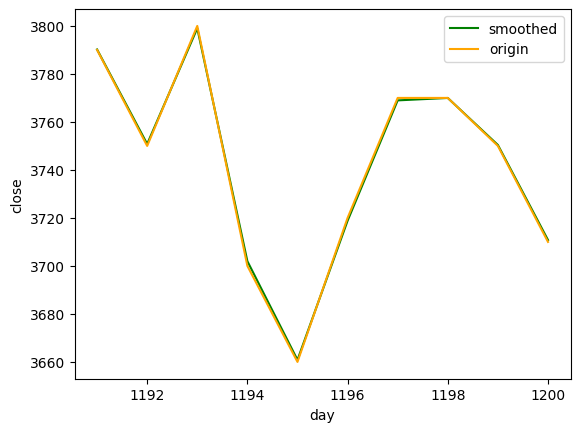

In [11]:
plt.plot(df["day"][-10:],smoothed_df["close"][-10:], color="Green", label="smoothed")
plt.plot(df["day"][-10:],df["close"][-10:], color="Orange", label="origin")


plt.xlabel("day")  # add X-axis label
plt.ylabel("close")  # add Y-axis label
plt.legend()
plt.show()

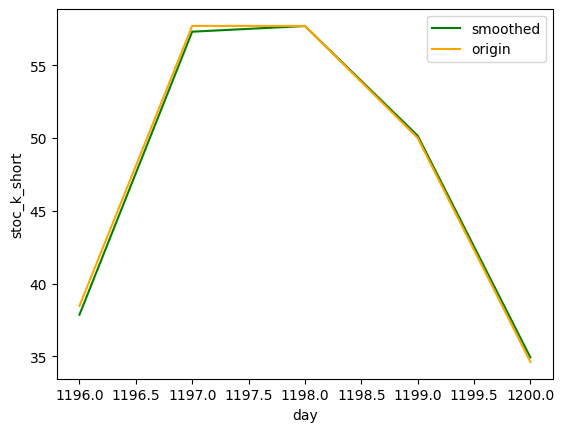

In [12]:
plt.plot(df["day"][-5:],smoothed_df["stoc_k_short"][-5:], color="Green", label="smoothed")
plt.plot(df["day"][-5:],df["stoc_k_short"][-5:], color="Orange", label="origin")


plt.xlabel("day")  # add X-axis label
plt.ylabel("stoc_k_short")  # add Y-axis label
plt.legend()
plt.show()

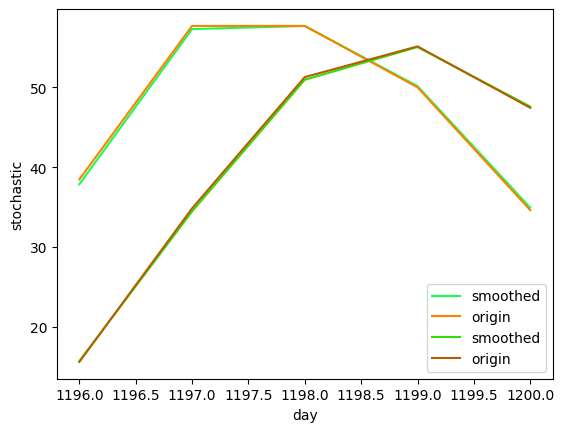

In [13]:
plt.plot(df["day"][-5:],smoothed_df["stoc_k_short"][-5:], color="#12ff51", label="smoothed")
plt.plot(df["day"][-5:],df["stoc_k_short"][-5:], color="#ff8000", label="origin")
plt.plot(df["day"][-5:],smoothed_df["stoc_d_long"][-5:], color="#34de00", label="smoothed")
plt.plot(df["day"][-5:],df["stoc_d_long"][-5:], color="#b55c04", label="origin")


plt.xlabel("day")  # add X-axis label
plt.ylabel("stochastic")  # add Y-axis label
plt.legend()
plt.show()

Calculate Technical Indicators

EMA, BBANDS, OBV, MOM (market momentum), TSI, ATR, COPP, CCI, MI, MFI, EMV, UO, VORTEX, DO, CHAIKIN

In [14]:
smoothed_df['ema'] = TA.EMA(smoothed_df)
smoothed_df['obv'] = TA.OBV(smoothed_df)
smoothed_df['market_momentum'] = TA.MOM(smoothed_df)
smoothed_df['atr'] = TA.ATR(smoothed_df)
smoothed_df['coppock'] = TA.COPP(smoothed_df)
smoothed_df['cci'] = TA.CCI(smoothed_df)
smoothed_df['mass_index'] = TA.MI(smoothed_df)
smoothed_df['mfi'] = TA.MFI(smoothed_df)
smoothed_df['emv'] = TA.EMV(smoothed_df)
smoothed_df['ultimate_osci'] = TA.UO(smoothed_df)
smoothed_df['chaikin'] = TA.CHAIKIN(smoothed_df)

In [15]:
bollinger_bands = TA.BBANDS(smoothed_df)
smoothed_df = pd.concat([smoothed_df, bollinger_bands], axis=1)
tsi = TA.TSI(smoothed_df)
smoothed_df = pd.concat([smoothed_df, tsi], axis=1)
vortex = TA.VORTEX(smoothed_df)
smoothed_df = pd.concat([smoothed_df, vortex], axis=1)
donchian = TA.DO(smoothed_df)
smoothed_df = pd.concat([smoothed_df, donchian], axis=1)

In [16]:
smoothed_df.isnull().value_counts()

close  low    high   open   volume  ma_5   ma_10  ma_20  ma_50  ma_100  stoc_k_short  stoc_d_long  rsi    macd   ema    obv    market_momentum  atr    coppock  cci    mass_index  mfi    emv    ultimate_osci  chaikin  BB_UPPER  BB_MIDDLE  BB_LOWER  TSI    signal  VIm    VIp    LOWER  MIDDLE  UPPER
False  False  False  False  False   False  False  False  False  False   False         False        False  False  False  False  False            False  False    False  False       False  False  False          False    False     False      False     False  False   False  False  False  False   False    1154
                                                                                                                                                                                                                                                               True    False  False  False  False   False      11
                                                                                          

In [17]:
smoothed_df

,close,low,high,open,volume,ma_5,ma_10,ma_20,ma_50,ma_100,...,BB_UPPER,BB_MIDDLE,BB_LOWER,TSI,signal,VIm,VIp,LOWER,MIDDLE,UPPER
0,3810.000000,3760.000000,3930.000000,3900.000000,9.126560e+07,3920.000000,3919.000000,4054.000000,4155.800000,4175.200000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3829.607843,3769.803922,3831.960784,3772.549020,6.649491e+07,3892.549020,3906.254902,4034.392157,4150.701961,4173.827451,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3839.792238,3818.996472,3859.439436,3848.451588,6.195305e+07,3874.370835,3910.905135,4015.387691,4143.545982,4172.428538,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3839.995845,3829.779931,3879.588792,3830.369029,7.299064e+07,3852.447413,3910.998103,3997.367751,4137.130919,4171.126571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3781.199917,3771.195598,3899.591776,3820.207381,1.438754e+08,3820.648948,3889.439962,3976.427355,4128.770618,4168.258531,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3760.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,3718.816792,3620.424237,3739.443922,3621.643531,5.119760e+07,3726.291330,3772.045288,3776.450183,3590.670191,3420.750904,...,3877.333722,3776.450183,3675.566645,12.641684,24.880451,1.028898,0.849528,3620.424237,3750.196278,3879.96832
1196,3768.976336,3718.008485,3779.188878,3747.432871,5.344827e+07,3729.925827,3764.160906,3776.989004,3598.637404,3423.739018,...,3877.576802,3776.989004,3676.401205,12.068113,23.050117,1.003095,0.916245,3620.424237,3750.196278,3879.96832
1197,3769.979527,3710.160170,3770.183778,3759.748657,4.333931e+07,3724.118517,3754.203218,3779.449780,3606.832748,3427.326780,...,3876.595165,3779.449780,3682.304395,11.644786,21.420784,1.019725,0.924006,3620.424237,3750.196278,3879.96832
1198,3750.399591,3710.003203,3779.803676,3779.594973,5.845021e+07,3733.802370,3751.064064,3777.048996,3615.424655,3430.436536,...,3874.593340,3777.048996,3679.504651,10.730439,19.893592,1.011328,0.891837,3620.424237,3750.196278,3879.96832


In [18]:
smoothed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   close            1200 non-null   float64
 1   low              1200 non-null   float64
 2   high             1200 non-null   float64
 3   open             1200 non-null   float64
 4   volume           1200 non-null   float64
 5   ma_5             1200 non-null   float64
 6   ma_10            1200 non-null   float64
 7   ma_20            1200 non-null   float64
 8   ma_50            1200 non-null   float64
 9   ma_100           1200 non-null   float64
 10  stoc_k_short     1200 non-null   float64
 11  stoc_d_long      1200 non-null   float64
 12  rsi              1200 non-null   float64
 13  macd             1200 non-null   float64
 14  ema              1200 non-null   float64
 15  obv              1199 non-null   float64
 16  market_momentum  1190 non-null   float64
 17  atr           

New dataframe with calculated TA exponential smoothed dataset

In [19]:
# new_df = pd.concat([df[['day','code','date']], smoothed_df], axis=1, sort=False)
new_df = pd.concat([df[['day','code','date']], smoothed_df, df[['label']]], axis=1, sort=False)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   day              1200 non-null   int64  
 1   code             1200 non-null   object 
 2   date             1200 non-null   object 
 3   close            1200 non-null   float64
 4   low              1200 non-null   float64
 5   high             1200 non-null   float64
 6   open             1200 non-null   float64
 7   volume           1200 non-null   float64
 8   ma_5             1200 non-null   float64
 9   ma_10            1200 non-null   float64
 10  ma_20            1200 non-null   float64
 11  ma_50            1200 non-null   float64
 12  ma_100           1200 non-null   float64
 13  stoc_k_short     1200 non-null   float64
 14  stoc_d_long      1200 non-null   float64
 15  rsi              1200 non-null   float64
 16  macd             1200 non-null   float64
 17  ema           

In [20]:
new_df.head()

,day,code,date,close,low,high,open,volume,ma_5,ma_10,...,BB_MIDDLE,BB_LOWER,TSI,signal,VIm,VIp,LOWER,MIDDLE,UPPER,label
0,1,TLKM,2016-11-24,3810.000000,3760.000000,3930.000000,3900.000000,9.126560e+07,3920.000000,3919.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2,TLKM,2016-11-25,3829.607843,3769.803922,3831.960784,3772.549020,6.649491e+07,3892.549020,3906.254902,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,3,TLKM,2016-11-28,3839.792238,3818.996472,3859.439436,3848.451588,6.195305e+07,3874.370835,3910.905135,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,4,TLKM,2016-11-29,3839.995845,3829.779931,3879.588792,3830.369029,7.299064e+07,3852.447413,3910.998103,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,5,TLKM,2016-11-30,3781.199917,3771.195598,3899.591776,3820.207381,1.438754e+08,3820.648948,3889.439962,...,NaN,NaN,NaN,NaN,NaN,NaN,3760.0,NaN,NaN,-1


Remmove Nan Values

In [21]:
# We need to remove all rows that have an NaN value.
print('Before NaN Drop we have {} rows and {} columns'.format(new_df.shape[0],new_df.shape[1]))

# Any row that has a `NaN` value will be dropped.
new_df =new_df.dropna()

# Display how much we have left now.
print('After NaN Drop we have {} rows and {} columns'.format(new_df.shape[0],new_df.shape[1]))

# Print the head.
new_df.head()

Before NaN Drop we have 1200 rows and 39 columns
After NaN Drop we have 1154 rows and 39 columns


,day,code,date,close,low,high,open,volume,ma_5,ma_10,...,BB_MIDDLE,BB_LOWER,TSI,signal,VIm,VIp,LOWER,MIDDLE,UPPER,label
46,47,TLKM,2017-02-01,3938.596248,3899.200157,3978.796086,3909.784320,7.724144e+07,3899.843166,3895.044073,...,3933.511648,3827.229326,0.789442,4.318492,0.900909,0.888255,3860.007845,3944.999998,4029.992152,1
47,48,TLKM,2017-02-02,3949.771925,3899.984003,3979.975922,3939.395686,7.396252e+07,3901.956863,3893.040881,...,3933.500233,3827.225319,2.116665,3.954938,0.902904,0.884588,3860.007845,3944.999998,4029.992152,1
48,49,TLKM,2017-02-03,3949.995438,3899.999680,3970.199518,3900.787914,5.951975e+07,3913.759137,3904.760818,...,3931.050005,3828.956140,3.182802,3.830223,0.940141,0.868827,3860.007845,3944.999998,4029.992152,1
49,50,TLKM,2017-02-06,3959.799909,3909.799994,3960.203990,3939.215758,5.313010e+07,3933.595183,3916.755216,...,3928.061000,3833.670645,4.370284,3.915855,0.958594,0.877374,3860.007845,3944.999998,4029.992152,1
50,51,TLKM,2017-02-07,3920.795998,3919.796000,3960.004080,3930.184315,6.575975e+07,3943.791904,3917.975104,...,3924.081220,3836.032666,3.940257,3.919664,0.967074,0.893225,3899.200157,3954.499958,4009.799760,-1


In [22]:
new_df.to_csv('dataset.csv')

Check Imbalance label

In [23]:
app_target = pd.DataFrame(new_df.groupby('label').size(), columns=['Count'])
app_target = app_target.sort_values(by=['Count'], ascending=False)
app_target = app_target.reset_index().rename(columns={'index': 'TARGET'})
app_target

,label,Count
0,1,602
1,-1,552


# Ekstraksi Fitur

Drop unused columns

In [24]:
tes = new_df.drop(["date","day","code","open","high","low","close","volume"], axis=1)

tes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1154 entries, 46 to 1199
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ma_5             1154 non-null   float64
 1   ma_10            1154 non-null   float64
 2   ma_20            1154 non-null   float64
 3   ma_50            1154 non-null   float64
 4   ma_100           1154 non-null   float64
 5   stoc_k_short     1154 non-null   float64
 6   stoc_d_long      1154 non-null   float64
 7   rsi              1154 non-null   float64
 8   macd             1154 non-null   float64
 9   ema              1154 non-null   float64
 10  obv              1154 non-null   float64
 11  market_momentum  1154 non-null   float64
 12  atr              1154 non-null   float64
 13  coppock          1154 non-null   float64
 14  cci              1154 non-null   float64
 15  mass_index       1154 non-null   float64
 16  mfi              1154 non-null   float64
 17  emv          

In [25]:
tes

,ma_5,ma_10,ma_20,ma_50,ma_100,stoc_k_short,stoc_d_long,rsi,macd,ema,...,BB_MIDDLE,BB_LOWER,TSI,signal,VIm,VIp,LOWER,MIDDLE,UPPER,label
46,3899.843166,3895.044073,3933.511648,3894.613062,4031.045391,68.954859,47.659004,52.587655,-6.003101,3903.831558,...,3933.511648,3827.229326,0.789442,4.318492,0.900909,0.888255,3860.007845,3944.999998,4029.992152,1
47,3901.956863,3893.040881,3933.500233,3894.992261,4030.020908,73.813879,60.605354,53.656028,-2.119026,3913.019836,...,3933.500233,3827.225319,2.116665,3.954938,0.902904,0.884588,3860.007845,3944.999998,4029.992152,1
48,3913.759137,3904.760818,3931.050005,3894.999845,4029.020418,73.911060,72.226600,53.677396,0.966031,3920.415089,...,3931.050005,3828.956140,3.182802,3.830223,0.940141,0.868827,3860.007845,3944.999998,4029.992152,1
49,3933.595183,3916.755216,3928.061000,3895.391997,4028.902408,78.173874,75.299605,54.706755,4.154213,3928.292165,...,3928.061000,3833.670645,4.370284,3.915855,0.958594,0.877374,3860.007845,3944.999998,4029.992152,1
50,3943.791904,3917.975104,3924.081220,3897.555840,4026.744048,70.163477,74.082804,49.956543,3.493312,3926.792915,...,3924.081220,3836.032666,3.940257,3.919664,0.967074,0.893225,3899.200157,3954.499958,4009.799760,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,3726.291330,3772.045288,3776.450183,3590.670191,3420.750904,37.856059,15.696989,50.877229,35.066739,3743.083611,...,3776.450183,3675.566645,12.641684,24.880451,1.028898,0.849528,3620.424237,3750.196278,3879.968320,1
1196,3729.925827,3764.160906,3776.989004,3598.637404,3423.739018,57.295583,34.446419,54.700109,34.198298,3748.262156,...,3776.989004,3676.401205,12.068113,23.050117,1.003095,0.916245,3620.424237,3750.196278,3879.968320,1
1197,3724.118517,3754.203218,3779.449780,3606.832748,3427.326780,57.684374,50.945338,54.776567,33.208198,3752.605630,...,3779.449780,3682.304395,11.644786,21.420784,1.019725,0.924006,3620.424237,3750.196278,3879.968320,1
1198,3733.802370,3751.064064,3777.048996,3615.424655,3430.436536,50.153687,55.044548,52.914267,30.492106,3752.164422,...,3777.048996,3679.504651,10.730439,19.893592,1.011328,0.891837,3620.424237,3750.196278,3879.968320,-1


Check feature Importance

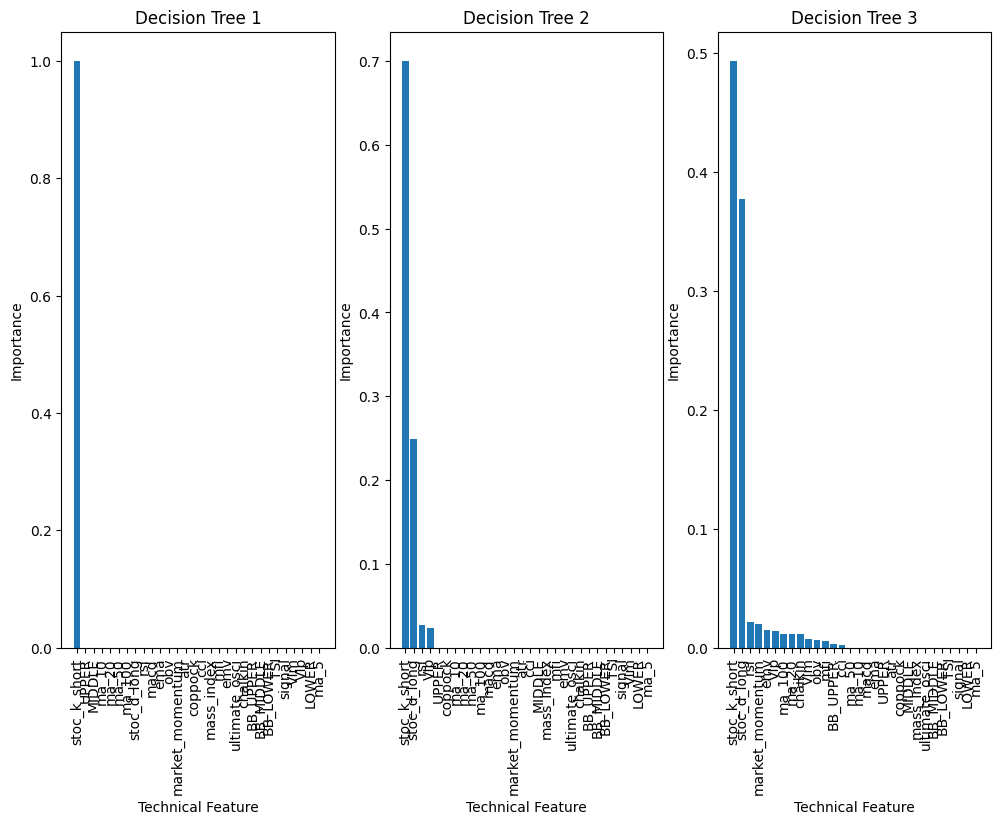

In [26]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tes.drop(["label"], axis=1), tes["label"], test_size=0.2, random_state=0, shuffle=False)


# Train three decision tree models with different max depths
dtr1 = DecisionTreeClassifier(max_depth=2, random_state=42)
dtr2 = DecisionTreeClassifier(max_depth=4, random_state=42)
dtr3 = DecisionTreeClassifier(max_depth=6, random_state=42)

dtr1.fit(X_train, y_train)
dtr2.fit(X_train, y_train)
dtr3.fit(X_train, y_train)

# Extract the feature importances
feat_importance1 = dtr1.feature_importances_
feat_importance2 = dtr2.feature_importances_
feat_importance3 = dtr3.feature_importances_


# Sort the feature importances in descending order for each decision tree
sorted_feat_importance1 = np.argsort(feat_importance1)[::-1]
sorted_feat_importance2 = np.argsort(feat_importance2)[::-1]
sorted_feat_importance3 = np.argsort(feat_importance3)[::-1]

# Plot the feature importances of each decision tree as a bar chart
plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.bar(range(len(sorted_feat_importance1)), feat_importance1[sorted_feat_importance1])
plt.xticks(range(len(sorted_feat_importance1)), tes.columns[sorted_feat_importance1], rotation=90)
plt.title("Decision Tree 1")
plt.xlabel("Technical Feature")
plt.ylabel("Importance")

plt.subplot(1, 3, 2)
plt.bar(range(len(sorted_feat_importance2)), feat_importance2[sorted_feat_importance2])
plt.xticks(range(len(sorted_feat_importance2)), tes.columns[sorted_feat_importance2], rotation=90)
plt.title("Decision Tree 2")
plt.xlabel("Technical Feature")
plt.ylabel("Importance")

plt.subplot(1, 3, 3)
plt.bar(range(len(sorted_feat_importance3)), feat_importance3[sorted_feat_importance3])
plt.xticks(range(len(sorted_feat_importance3)), tes.columns[sorted_feat_importance3], rotation=90)
plt.title("Decision Tree 3")
plt.xlabel("Technical Feature")
plt.ylabel("Importance")

plt.show() 

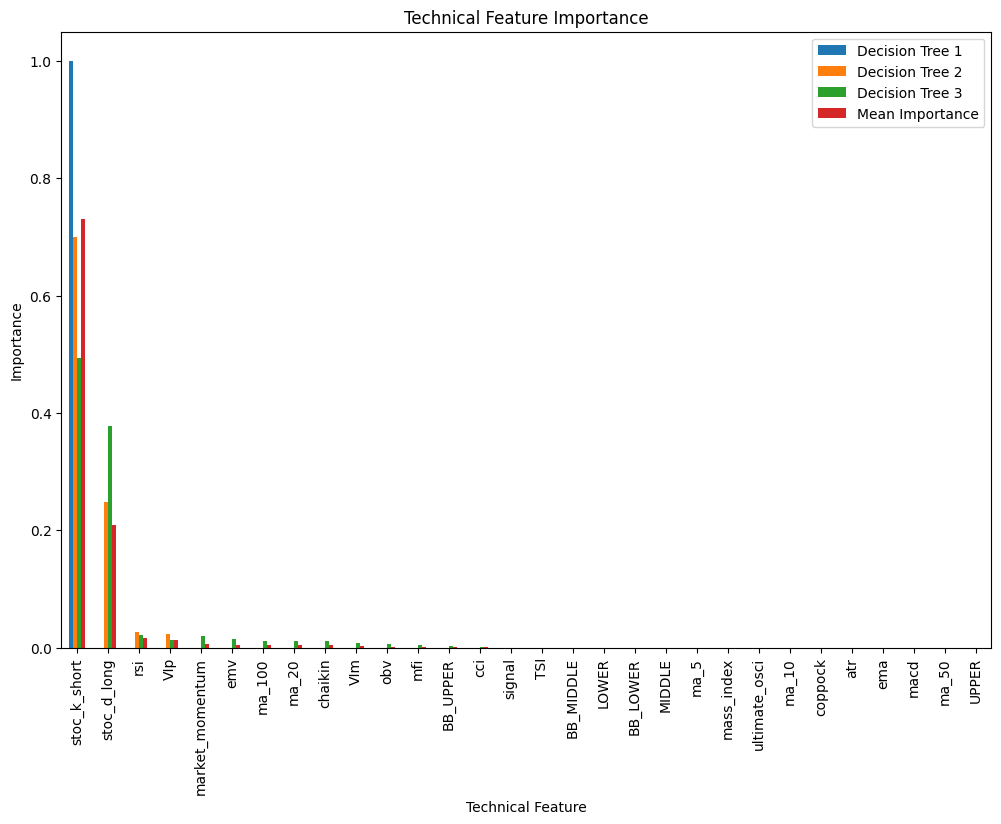

In [27]:
# Get the unique list of technical features across all three decision trees
unique_features = np.unique(np.concatenate((sorted_feat_importance1, sorted_feat_importance2, sorted_feat_importance3)))


# Create a dataframe to store the feature importances for each decision tree
feat_importance_df = pd.DataFrame({
    "Decision Tree 1": feat_importance1[unique_features],
    "Decision Tree 2": feat_importance2[unique_features],
    "Decision Tree 3": feat_importance3[unique_features],
}, index=tes.columns[unique_features])

# Calculate the mean feature importance across all three decision trees
feat_importance_df["Mean Importance"] = feat_importance_df.mean(axis=1)

# Sort the dataframe by mean feature importances in descending order
feat_importance_df = feat_importance_df.sort_values(by="Mean Importance", ascending=False)


# Plot the feature importances of all three decision trees as a bar chart
feat_importance_df.plot(kind="bar", figsize=(12, 8))
plt.title("Technical Feature Importance")
plt.xlabel("Technical Feature")
plt.ylabel("Importance")
plt.show()

In [28]:
feat_importance_df

,Decision Tree 1,Decision Tree 2,Decision Tree 3,Mean Importance
stoc_k_short,1.0,0.700014,0.493228,0.731081
stoc_d_long,0.0,0.249008,0.377219,0.208742
rsi,0.0,0.027434,0.021603,0.016346
VIp,0.0,0.023543,0.013844,0.012463
market_momentum,0.0,0.000000,0.020323,0.006774
emv,0.0,0.000000,0.014980,0.004993
ma_100,0.0,0.000000,0.011853,0.003951
ma_20,0.0,0.000000,0.011629,0.003876
chaikin,0.0,0.000000,0.011561,0.003854
VIm,0.0,0.000000,0.007238,0.002413


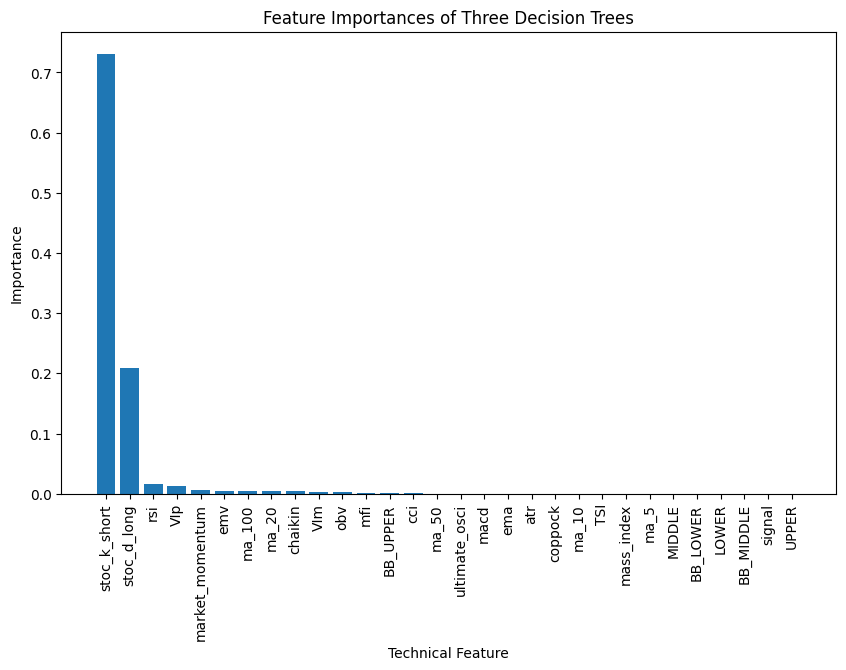

In [29]:
# Sort the features by mean importance in descending order
sorted_feat_importance = feat_importance_df['Mean Importance'].sort_values(ascending=False).index

# Plot the feature importances as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feat_importance)), feat_importance_df.loc[sorted_feat_importance, 'Mean Importance'])
plt.xticks(range(len(sorted_feat_importance)), sorted_feat_importance, rotation=90)
plt.title("Feature Importances of Three Decision Trees")
plt.xlabel("Technical Feature")
plt.ylabel("Importance")
plt.show()

In [30]:
sorted_feat_importance

Index(['stoc_k_short', 'stoc_d_long', 'rsi', 'VIp', 'market_momentum', 'emv',
       'ma_100', 'ma_20', 'chaikin', 'VIm', 'obv', 'mfi', 'BB_UPPER', 'cci',
       'ma_50', 'ultimate_osci', 'macd', 'ema', 'atr', 'coppock', 'ma_10',
       'TSI', 'mass_index', 'ma_5', 'MIDDLE', 'BB_LOWER', 'LOWER', 'BB_MIDDLE',
       'signal', 'UPPER'],
      dtype='object')

# Optimized Model

## Training

Optimized params with random search

In [31]:
# initiate params
max_depth = list(range(10, 120, 10))
max_depth.append(None)

# Number of features to consider at every split
max_features = ['auto', 'sqrt', None, 'log2']

# Define the parameter grid to search over
param_dist = {"n_estimators": [9, 50, 99, 130, 180, 230],
              "max_depth": max_depth,
              'max_features': max_features,
              "min_samples_split": [2, 5, 10, 20],
              "min_samples_leaf": [1, 2, 4, 10, 30],
              "random_state":[42]
              }

# Create a random forest classifier object
rf = RandomForestClassifier()

# Perform random search with 3-fold cross-validation
n_iter_search = 100  # Number of parameter settings that are sampled
random_search = RandomizedSearchCV(estimator = rf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=3, verbose=2,
                                   n_jobs=-1, random_state=42)

# Fit the random search object to the data
random_search.fit(X_train, y_train)

# Make predictions
y_pred = random_search.predict(X_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [32]:
print("Best parameters:", random_search.best_params_)
print("Params score:", random_search.best_score_)

Best parameters: {'random_state': 42, 'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 80}
Params score: 0.8245131632753783


## Testing

Akurasi & klasifikasi report

In [33]:
# Once the predictions have been made, then grab the accuracy score.
print('Correct Prediction (%): ', accuracy_score(y_test, random_search.predict(X_test), normalize = True) * 100.0)

# Define the traget names
target_names = ['Down', 'Up']

# Build a classifcation report
report = classification_report(y_true = y_test, y_pred = y_pred, target_names = target_names, output_dict = True)

# Add it to a data frame, transpose it for readability.
report_df = pd.DataFrame(report).transpose()
display(report_df)
print('\n')

# Calculate feature importance and store in pandas series
# feature_imp = pd.Series(dtr3.feature_importances_, index=tes.drop(['label'], axis=1).columns).sort_values(ascending=False)
# display(feature_imp)

Correct Prediction (%):  80.95238095238095


,precision,recall,f1-score,support
Down,0.820513,0.806723,0.813559,119.000000
Up,0.798246,0.812500,0.805310,112.000000
accuracy,0.809524,0.809524,0.809524,0.809524
macro avg,0.809379,0.809611,0.809435,231.000000
weighted avg,0.809717,0.809524,0.809560,231.000000


confusion matriks Optimized

Accuracy: 0.8095238095238095
Percision: 0.7982456140350878
Recall: 0.8125
Specificity: 0.8067226890756303
1-Specificity: 0.19327731092436976


c:\Users\nizar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


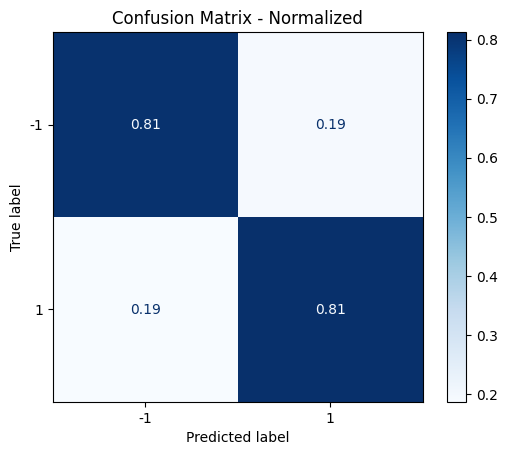

In [34]:
rf_matrix = confusion_matrix(y_test, y_pred)

true_negatives = rf_matrix[0][0]
false_negatives = rf_matrix[1][0]
true_positives = rf_matrix[1][1]
false_positives = rf_matrix[0][1]

accuracy = (true_negatives + true_positives) / (true_negatives + true_positives + false_negatives + false_positives)
percision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)
r_specificity = false_positives / (true_negatives + false_positives)

print('Accuracy: {}'.format(float(accuracy)))
print('Percision: {}'.format(float(percision)))
print('Recall: {}'.format(float(recall)))
print('Specificity: {}'.format(float(specificity)))
print('1-Specificity: {}'.format(float(r_specificity)))

disp = plot_confusion_matrix(random_search, X_test, y_test, normalize = 'true', cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix - Normalized')
plt.show()

Chart Analysis

In [35]:
test_roc_auc = roc_auc_score(y_test, y_pred)
print("Test ROC AUC score: ", test_roc_auc)

Test ROC AUC score:  0.8096113445378152


c:\Users\nizar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


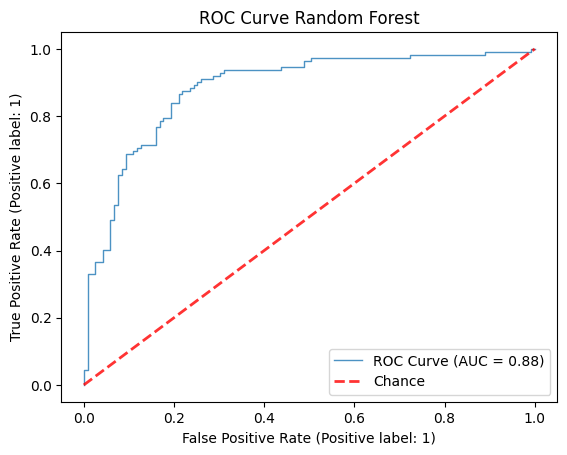

In [36]:
fig, ax = plt.subplots()

# Create an ROC Curve plot.
rfc_disp = plot_roc_curve(random_search, X_test, y_test, alpha = 0.8, name='ROC Curve', lw=1, ax=ax)

# Add our Chance Line
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

# Make it look pretty.
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05], title="ROC Curve Random Forest")

# Add the legend to the plot
ax.legend(loc="lower right")

plt.show()

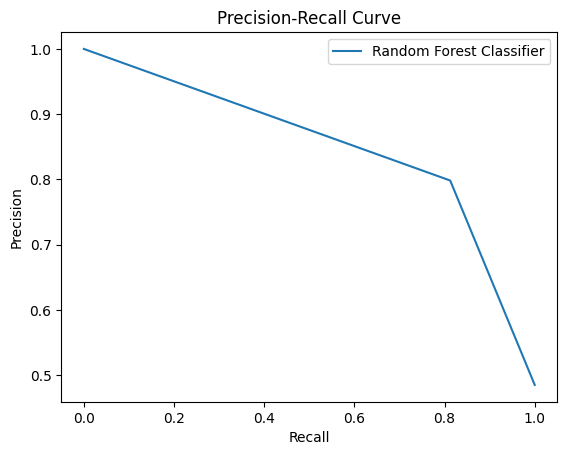

In [37]:
# Make predictions on the test data
# y_pred = random_search.predict_proba(X_test)[:, 1]

# Calculate precision and recall at different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Plot the precision-recall curve
plt.plot(recall, precision, label='Random Forest Classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

Prediction chart with time window

In [38]:
index_window = new_df[['rsi','stoc_k_short', 'macd','date']]

index_window[-20:]

,rsi,stoc_k_short,macd,date
1180,68.837434,81.247441,99.709344,2021-10-12
1181,67.453737,78.435759,98.318309,2021-10-13
1182,70.977682,94.271418,100.782062,2021-10-14
1183,68.374132,88.996540,100.093788,2021-10-15
1184,65.662908,83.446597,96.820939,2021-10-18
1185,59.397867,64.894738,89.212677,2021-10-19
1186,66.706400,88.797894,90.755736,2021-10-21
1187,67.995386,96.275957,92.664376,2021-10-22
1188,58.310775,62.233212,86.102527,2021-10-25
1189,59.499877,65.157707,81.403761,2021-10-26


In [39]:
len(index_window['rsi'].unique().tolist())

1154

In [40]:
y_axis = []
for i in range(len(y_pred)):
    y_axis.append(accuracy_score(y_test.to_list()[:i], y_pred[:i]))

c:\Users\nizar\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
c:\Users\nizar\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [41]:
windo_df = pd.merge(X_test, index_window, on=['rsi', 'stoc_k_short', 'macd'])

windo_df['Accuracy'] = y_axis

windo_df

,ma_5,ma_10,ma_20,ma_50,ma_100,stoc_k_short,stoc_d_long,rsi,macd,ema,...,BB_LOWER,TSI,signal,VIm,VIp,LOWER,MIDDLE,UPPER,date,Accuracy
0,3375.015836,3273.042632,3044.643335,2846.743283,2919.914312,93.837606,91.681902,73.906699,173.619908,3292.415584,...,2478.181594,41.826851,28.087506,0.564966,1.277741,3219.184150,3359.374032,3499.563913,2020-11-27,NaN
1,3358.340317,3289.660853,3078.312867,2855.618866,2920.880286,57.199333,83.055748,58.417174,160.611871,3280.852965,...,2554.384280,37.307483,29.404646,0.647320,1.133564,3223.944008,3361.753961,3499.563913,2020-11-30,0.000000
2,3336.446806,3291.953217,3111.326257,2864.028377,2922.075606,52.816714,67.951218,58.514190,149.012014,3272.660782,...,2639.041702,34.010166,30.062577,0.815284,1.102416,3161.278880,3330.421397,3499.563913,2020-12-01,0.500000
3,3345.808936,3306.699064,3148.736525,2872.820568,2924.843512,68.765425,59.593824,62.077936,145.270001,3283.768194,...,2739.313960,32.508485,30.411993,0.803717,1.072137,3161.278880,3330.421397,3499.563913,2020-12-02,0.333333
4,3312.676179,3319.733981,3175.454731,2882.600411,2926.662870,58.541975,60.041371,60.292039,138.478313,3287.127346,...,2803.074764,30.738031,30.458569,0.762586,1.145692,3161.278880,3330.421397,3499.563913,2020-12-03,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,3726.291330,3772.045288,3776.450183,3590.670191,3420.750904,37.856059,15.696989,50.877229,35.066739,3743.083611,...,3675.566645,12.641684,24.880451,1.028898,0.849528,3620.424237,3750.196278,3879.968320,2021-11-03,0.805310
227,3729.925827,3764.160906,3776.989004,3598.637404,3423.739018,57.295583,34.446419,54.700109,34.198298,3748.262156,...,3676.401205,12.068113,23.050117,1.003095,0.916245,3620.424237,3750.196278,3879.968320,2021-11-04,0.806167
228,3724.118517,3754.203218,3779.449780,3606.832748,3427.326780,57.684374,50.945338,54.776567,33.208198,3752.605630,...,3682.304395,11.644786,21.420784,1.019725,0.924006,3620.424237,3750.196278,3879.968320,2021-11-05,0.807018
229,3733.802370,3751.064064,3777.048996,3615.424655,3430.436536,50.153687,55.044548,52.914267,30.492106,3752.164422,...,3679.504651,10.730439,19.893592,1.011328,0.891837,3620.424237,3750.196278,3879.968320,2021-11-08,0.807860


In [42]:
windf = windo_df[['date','Accuracy']]


windf = windf.fillna(0)
windf.isnull().value_counts()

date   Accuracy
False  False       231
dtype: int64

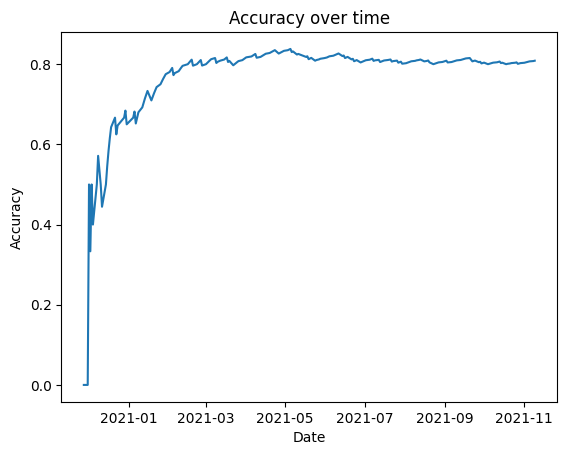

<Figure size 1500x2000 with 0 Axes>

In [43]:
# Convert date column to datetime format
windf['date'] = pd.to_datetime(windf['date'])

# Create line plot
plt.plot(windf['date'], windf['Accuracy'])
plt.xlabel('Date')
plt.ylabel('Accuracy')
plt.title('Accuracy over time')
plt.figure(figsize=(15, 20))
plt.show()